In [102]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem import Draw, inchi
from IPython.display import display, Markdown
import json

In [103]:
# read in smarts constants
with open('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/constants/RXN_SMARTS_CONSTANTS.json') as f:
    reaction_smarts = json.load(f)

In [104]:
# def
def run_reaction(rxn_smarts, mol_smiles):
    rxn = Chem.rdChemReactions.ReactionFromSmarts(rxn_smarts)
    mol = Chem.MolFromSmiles(mol_smiles)
    display(Draw.ReactionToImage(rxn))
    products = rxn.RunReactants((mol,))
    display(Draw.MolToImage(mol))
    if len(products) == 0:
        display('No products')
    else:
        product_images = [Draw.MolToImage(p[0]) for p in products]
        display(product_images[0])
    return products
def how_many_products(rxn_smarts, mol_smiles):
    rxn = Chem.rdChemReactions.ReactionFromSmarts(rxn_smarts)
    mol = Chem.MolFromSmiles(mol_smiles)
    products = rxn.RunReactants((mol,))
    return products
def run_reaction_in_place(rxn_smarts, mol_smiles):
    rxn = Chem.rdChemReactions.ReactionFromSmarts(rxn_smarts)
    mol = Chem.MolFromSmiles(mol_smiles)
    display(Draw.MolToImage(mol))
    rxn.RunReactantInPlace(mol)
    display(Draw.MolToImage(mol))
    return mol
def unique_molecules_by_inchi(mol_list):
    seen = set()  # A set to store unique InChI keys
    unique_mols = []  # List to store unique molecules
    for mol in mol_list:
        if mol is None:
            continue
        # Generate the InChI key for the molecule
        inchi_key = inchi.MolToInchiKey(mol)
        if inchi_key not in seen:
            print(inchi_key)
            seen.add(inchi_key)
            unique_mols.append(mol)
    return unique_mols

# CHECK SMARTS ERRORS FROM https://github.com/mwinokan/HIPPO/issues/94#issue-2272434775

# N-Boc deprotection

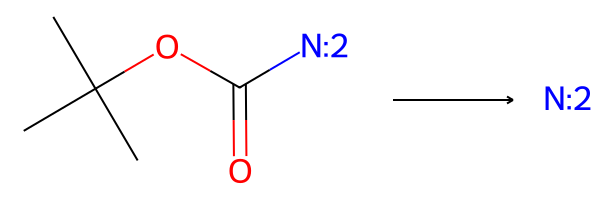

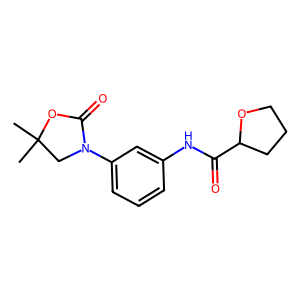

'No products'

()

In [105]:
# N boc deprotection
run_reaction(reaction_smarts['N-Boc_deprotection'], 'CC(C1)(C)OC(N1C2=CC=CC(NC(C3OCCC3)=O)=C2)=O')

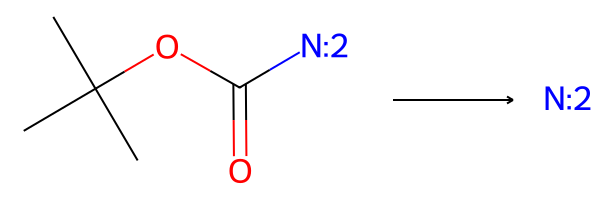

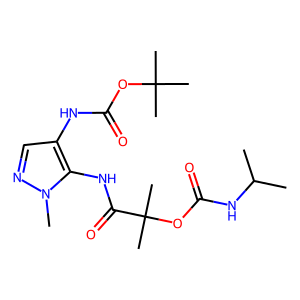

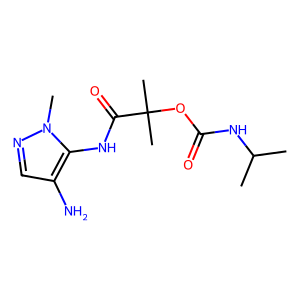

((<rdkit.Chem.rdchem.Mol at 0x1322d0c80>,),
 (<rdkit.Chem.rdchem.Mol at 0x1322d05f0>,),
 (<rdkit.Chem.rdchem.Mol at 0x1322d0ba0>,),
 (<rdkit.Chem.rdchem.Mol at 0x1322d0f90>,),
 (<rdkit.Chem.rdchem.Mol at 0x1322d0c10>,),
 (<rdkit.Chem.rdchem.Mol at 0x1322d0b30>,))

In [106]:
run_reaction(reaction_smarts['N-Boc_deprotection'], 'CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(NC(=O)OC(C)(C)C)cnn1C')

In [107]:
products = how_many_products(reaction_smarts['N-Boc_deprotection'], 'CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(NC(=O)OC(C)(C)C)cnn1C')
products = [product[0] for product in products]
for product in products:
    print(Chem.MolToSmiles(product))
    #display(Draw.MolToImage(product))

CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(N)cnn1C
CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(N)cnn1C
CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(N)cnn1C
CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(N)cnn1C
CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(N)cnn1C
CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(N)cnn1C


In [108]:
products = how_many_products(reaction_smarts['N-Boc_deprotection'], 'CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(NC(=O)OC(C)(C)C)cnn1C')
products = [product[0] for product in products]
print(len(products))

6


In [109]:
unique_products = unique_molecules_by_inchi(products)
print(len(unique_products))

YPDOCTSSSLIGJA-UHFFFAOYSA-N
1


In [110]:
# %timeit unique_molecules_by_inchi(products)

YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFFAOYSA-N
YPDOCTSSSLIGJA-UHFFF

# Benzyl_alcohol_deprotection

In [ ]:
run_reaction(reaction_smarts['Benzyl_alcohol_deprotection'], 'CC(C1)(C)OC(N1C2=CC=CC(NC(C3OCCC3)=O)=C2)=O')